# Visual story telling part 2: Capital Metro data

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv('capmetro_UT.csv')

df.columns.values

array(['timestamp', 'boarding', 'alighting', 'day_of_week', 'temperature',
       'hour_of_day', 'month', 'weekend'], dtype=object)

### We can first look at average boardings and alightings of each of the days by hour

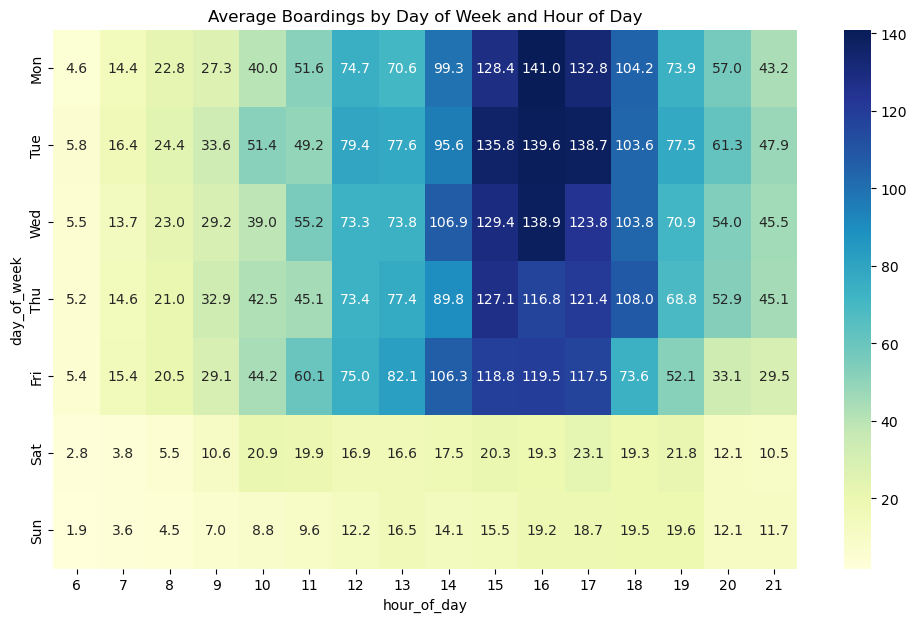

In [3]:
# Create a custom order for days of the week
custom_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Apply the custom order to the day_of_week column
df['day_of_week'] = df['day_of_week'].astype('category').cat.reorder_categories(custom_order, ordered=True)

# Calculate the average boarding for each hour of the day and each day of the week
heatmap_data = df.groupby(['day_of_week', 'hour_of_day'])['boarding'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Boardings by Day of Week and Hour of Day')
plt.show()

The boarding pattern makes sense as most students would start going to school around 10 AM in the morning and then everyone would start returning after 4 PM. Weekends have lower and steady boarding rate

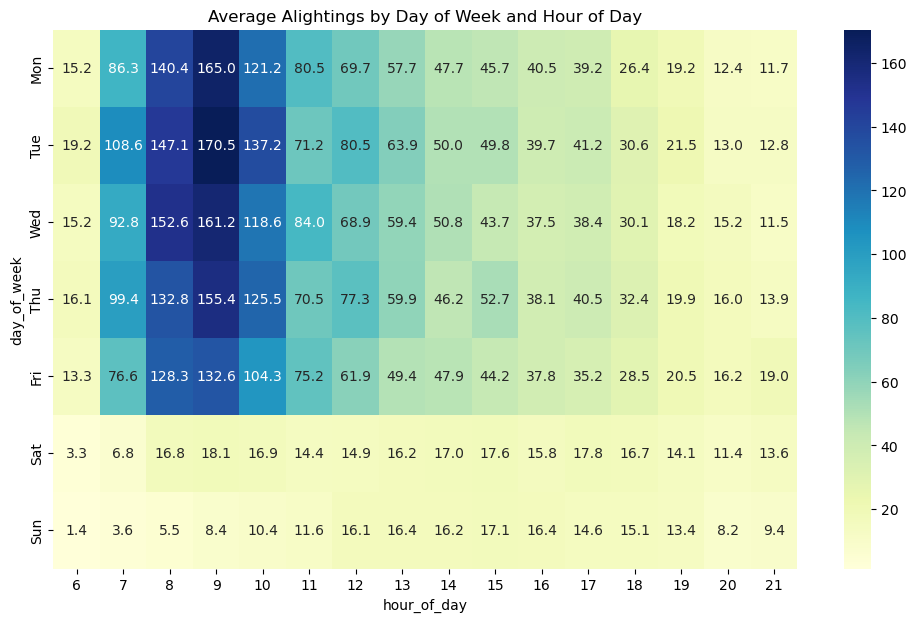

In [6]:
# Create a custom order for days of the week
custom_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Apply the custom order to the day_of_week column
df['day_of_week'] = df['day_of_week'].astype('category').cat.reorder_categories(custom_order, ordered=True)

# Calculate the average boarding for each hour of the day and each day of the week
heatmap_data = df.groupby(['day_of_week', 'hour_of_day'])['alighting'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Alightings by Day of Week and Hour of Day')
plt.show()

There seems to be something off with the alighting data as it is completely contradictory to the boarding pattern. Volume of alighting peaks around 8 AM in the mornin when majority of the people have not even boarded the bus.

### Therefore, for the purpose of our analysis, we will ignore alighting data.

### Let us now look at the impact of temerature on boardings

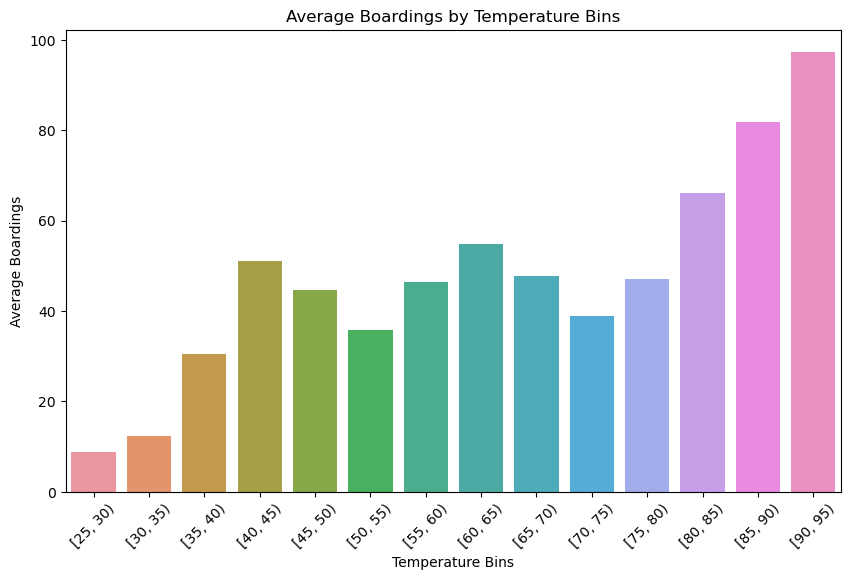

In [11]:
# Bin the temperature values into ranges of 5 degrees
temperature_bins = pd.cut(df['temperature'], bins=range(25, 100, 5), right=False)
temperature_boardings = df.groupby(temperature_bins)['boarding'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=temperature_boardings.index, y=temperature_boardings.values)
plt.title('Average Boardings by Temperature Bins')
plt.xlabel('Temperature Bins')
plt.ylabel('Average Boardings')
plt.xticks(rotation=45)
plt.show()

As we can see, boardings are much lower during low temperatures and become more frequent during higher temperatures.

### Let's now look at variation of boardings by months

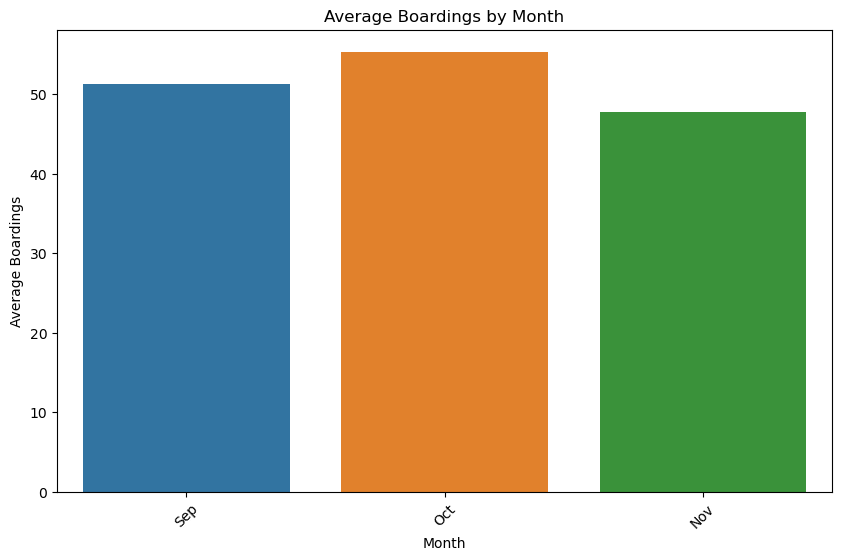

In [19]:
# Create a bar plot showing average boardings by month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='boarding', data=df, ci=None)
plt.title('Average Boardings by Month')
plt.xlabel('Month')
plt.ylabel('Average Boardings')
plt.xticks(rotation=45)
plt.show()

Avg Boardings in October is slightly higher than the other two months

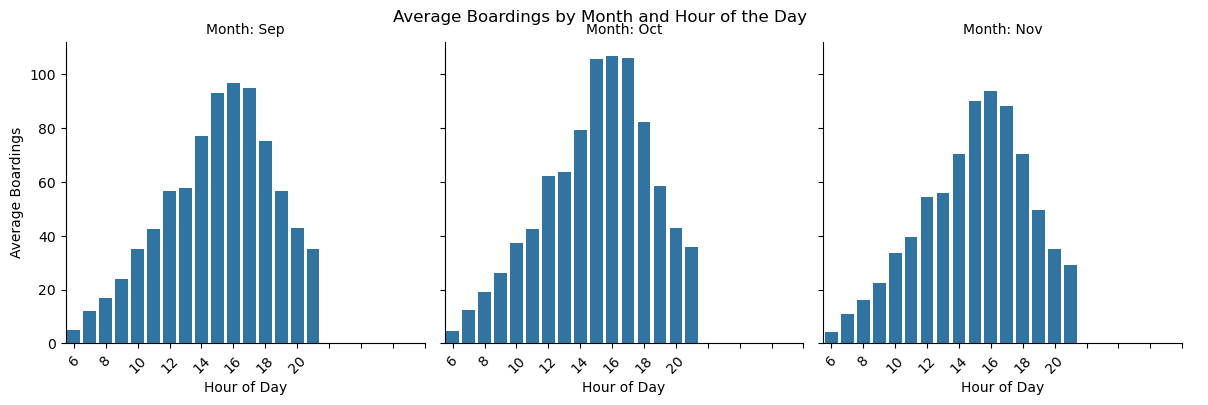

In [18]:
# Create a facet grid of average boardings by month and hour of the day
g = sns.FacetGrid(df, col='month', col_wrap=3, height=4)
g.map_dataframe(sns.barplot, x='hour_of_day', y='boarding', ci=None)
g.set_axis_labels('Hour of Day', 'Average Boardings')
g.set_titles('Month: {col_name}')
g.set(xticks=range(0, 24, 2))
g.set_xticklabels(rotation=45)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average Boardings by Month and Hour of the Day')
plt.show()

Hourly pattern of boardings in each of the months is almost the same

### Overall, we can conclude that boardings are likely to be higher during the month of October on weekdays between 12 noon to 7 PM especially when the temperature is higher.